<a href="https://colab.research.google.com/github/KennethLengo/KL-ML-Basics-Assignments/blob/main/ML_Basics_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coding Exercise - ML Basics**

# **Part 3 - Customer Segmentation:**


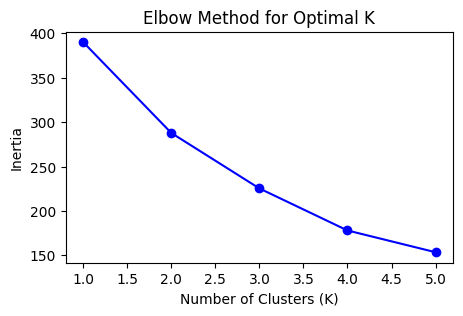

Cluster Characteristics:
         annual_spending  purchase_frequency    age
cluster                                            
0                 857.91               19.46  50.94
1                1273.17               13.33  27.40
2                 843.17                6.98  46.68

Cluster 0 Strategy:
Frequent buyers: Provide bulk discounts or subscription plans.

Cluster 1 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.

Cluster 2 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.

The elbow method graph shows how inertia decreases as the number of clusters is increased. This elbow method
helps determine the optimal amount of clusters, by finding the point where adding more clusters no longer significantly
improves clustering performance. In this case, the optimal point is 3 clusters, since there would be diminishing returns beyond that.

Cluster 0 represents the oldest customers who make the most purchases per year, and

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample customer data
# ChatGPT prompts with 100+ rows
data = ('https://raw.githubusercontent.com/KennethLengo/MISTEST2026/refs/heads/main/customer_spending_dataset.csv')
df = pd.read_csv(data)

# Preprocess data: Select numerical features and scale them
features = ['annual_spending', 'purchase_frequency', 'age']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertia = []
K = range(1, 6)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(5, 3))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_plot.png')
plt.show() #Dispays the plot in the output
plt.close()

# Apply K-Means with optimal K (e.g., 3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Characteristics:")
print(cluster_summary)

# Example of targeted strategies
for cluster in range(optimal_k):
  print(f"\nCluster {cluster} Strategy:")
  if cluster_summary.loc[cluster, 'annual_spending'] > 1000:
    print("High-spending customers: Offer exclusive promotions or loyalty rewards.")
  elif cluster_summary.loc[cluster, 'purchase_frequency'] > 10:
    print("Frequent buyers: Provide bulk discounts or subscription plans.")
  else:
    print("Low-engagement customers: Send personalized re-engagement campaigns.")

# Save cluster assignments to CSV
df.to_csv('customer_segments.csv', index=False)

# Explanations And Interpretations of Data
print('''\nThe elbow method graph shows how inertia decreases as the number of clusters is increased. This elbow method
helps determine the optimal amount of clusters, by finding the point where adding more clusters no longer significantly
improves clustering performance. In this case, the optimal point is 3 clusters, since there would be diminishing returns beyond that.''')
print('\nCluster 0 represents the oldest customers who make the most purchases per year, and spend moderately.''')
print('Cluster 1 represents the youngest customers who make moderate amounts of purchases per year, and spend the most.')
print('Cluster 2 represents the middle-aged customers who make the least purchases per year, and spend the least')
print('''\nThe improvement made includes displaying the graph for the elbow method, to provide clear and effective
visualization when dictating the optimal amount of clusters.''')